# 用户指南，第20章：案例2
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_20_examples2.html)

TODO

In [1]:
from music21 import *

corpus.search('bach')

<music21.metadata.bundles.MetadataBundle {564 entries}>

In [2]:
corpus.search('bach', fileExtensions='musicxml')

<music21.metadata.bundles.MetadataBundle {412 entries}>

In [3]:
chorales = corpus.search('bach', fileExtensions=('musicxml',))
chorales[0]

<music21.metadata.bundles.MetadataEntry 'bach_bwv1_6_mxl'>

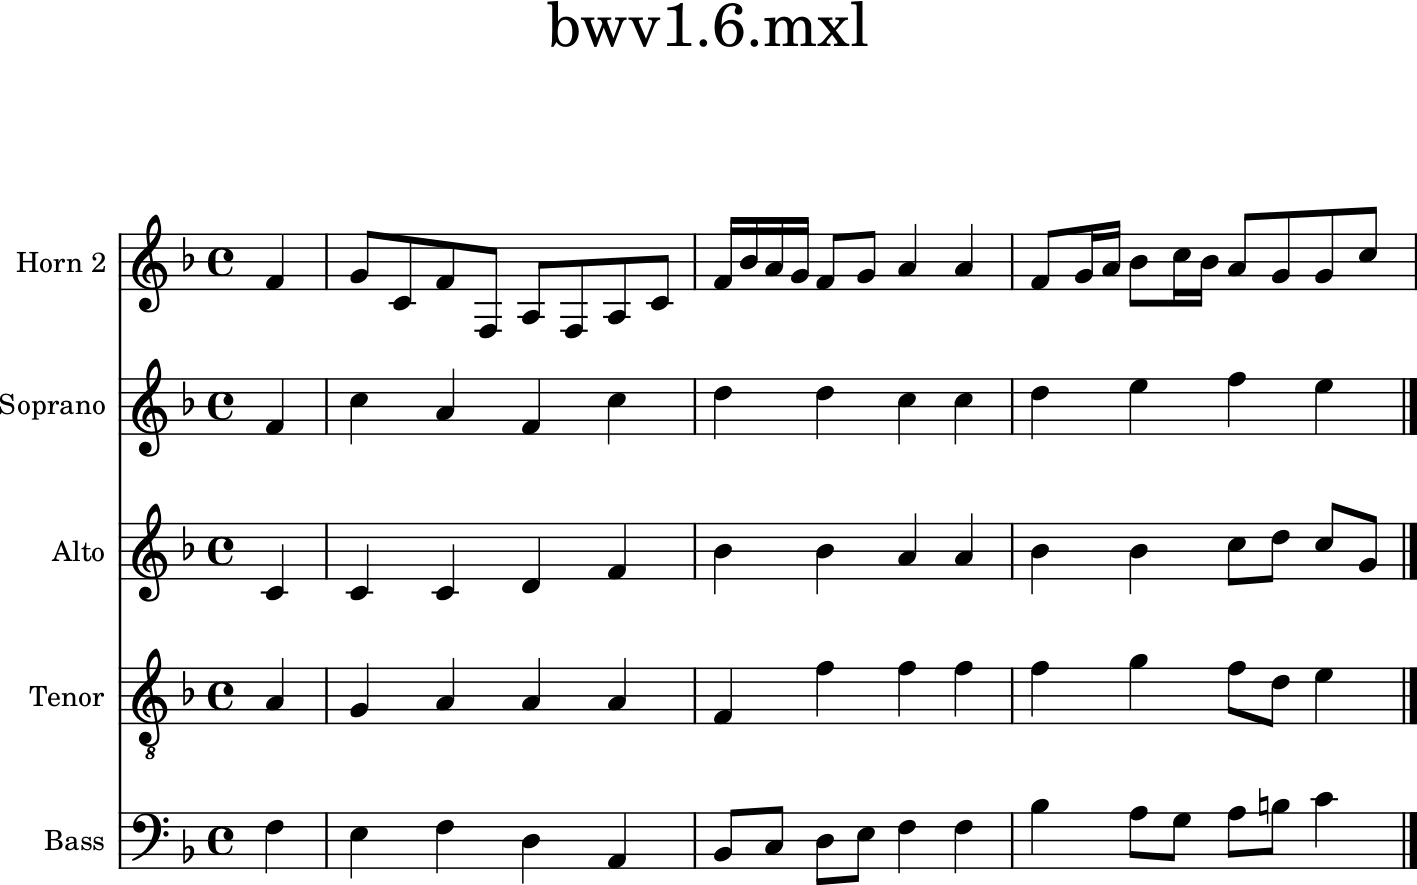

In [4]:
bwv1 = chorales[0].parse()
bwv1.measures(0, 3).show()

In [5]:
bwv1.analyze('key')

<music21.key.Key of F major>

In [6]:
for i, chorale in enumerate(chorales[:20]):
    cScore = chorale.parse()
    if cScore.analyze('key').mode == 'minor':
        print(i, chorale)

1 <music21.metadata.bundles.MetadataEntry 'bach_bwv10_7_mxl'>
2 <music21.metadata.bundles.MetadataEntry 'bach_bwv101_7_mxl'>
3 <music21.metadata.bundles.MetadataEntry 'bach_bwv102_7_mxl'>
4 <music21.metadata.bundles.MetadataEntry 'bach_bwv103_6_mxl'>
6 <music21.metadata.bundles.MetadataEntry 'bach_bwv108_6_mxl'>
8 <music21.metadata.bundles.MetadataEntry 'bach_bwv110_7_mxl'>
9 <music21.metadata.bundles.MetadataEntry 'bach_bwv111_6_mxl'>
12 <music21.metadata.bundles.MetadataEntry 'bach_bwv113_8_mxl'>
13 <music21.metadata.bundles.MetadataEntry 'bach_bwv114_7_mxl'>


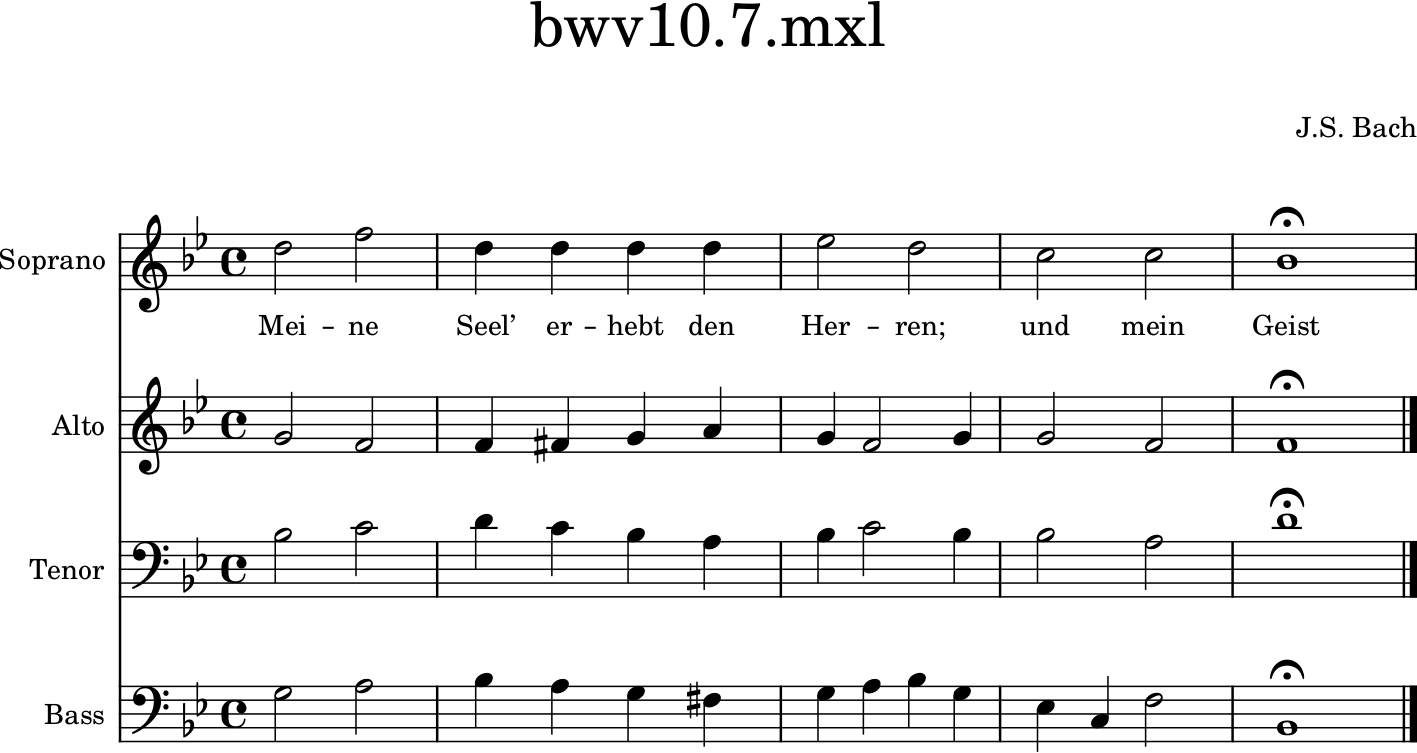

In [7]:
bwv10 = corpus.parse('bwv10')
bwv10.measures(0, 5).show()

In [8]:
soprano = bwv10.parts[0]
len(soprano.getElementsByClass('Measure'))

22

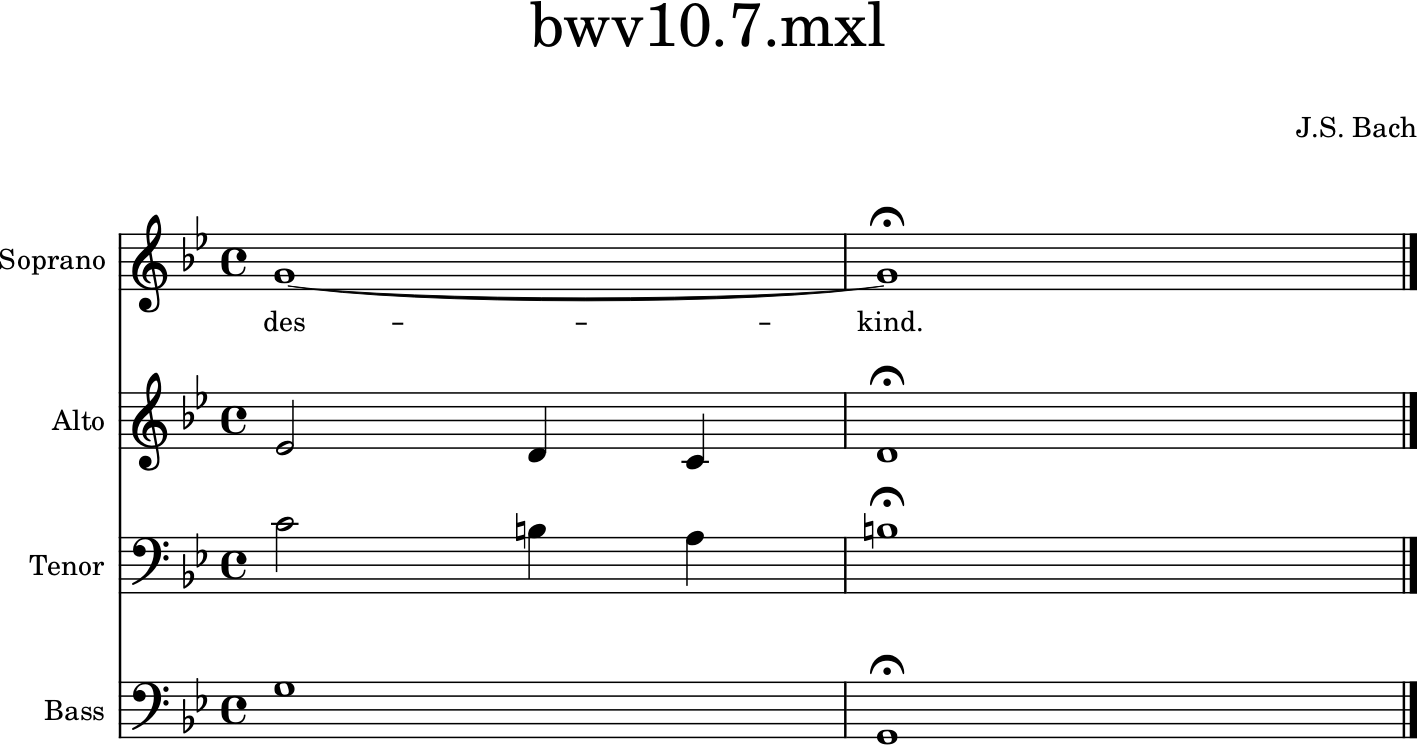

In [9]:
bwv10.measures(21, 22).show()

In [10]:
lastPitches = []

for part in bwv10.parts:
    lastPitch = part.pitches[-1]
    lastPitches.append(lastPitch)

lastPitches

[<music21.pitch.Pitch G4>,
 <music21.pitch.Pitch D4>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch G2>]

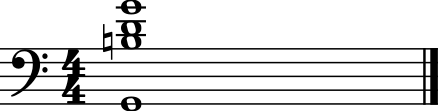

In [11]:
c = chord.Chord(lastPitches)
c.duration.type = 'whole'
c.show()

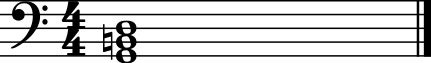

In [12]:
cClosed = c.closedPosition()
cClosed.show()

In [13]:
cClosed.isMajorTriad()

True

In [14]:
cClosed.root()

<music21.pitch.Pitch G2>

In [15]:
bwv10.analyze('key').tonic.name

'G'

In [16]:
cClosed.root().name

'G'

In [17]:
def getLastChord(score):
    lastPitches = []

    for part in score.parts:
        lastPitch = part.pitches[-1]
        lastPitches.append(lastPitch)

    c = chord.Chord(lastPitches)
    c.duration.type = 'whole'

    cClosed = c.closedPosition()
    return cClosed

In [18]:
getLastChord(bwv10)

<music21.chord.Chord G2 B2 D3>

In [19]:
def isRelevant(score):
    analyzedKey = score.analyze('key')
    if analyzedKey.mode != 'minor':
        return False
    lastChord = getLastChord(score)
    if lastChord.isMinorTriad() is False:
        return False
    if lastChord.root().name != analyzedKey.tonic.name:
        return False
    else:
        return lastChord

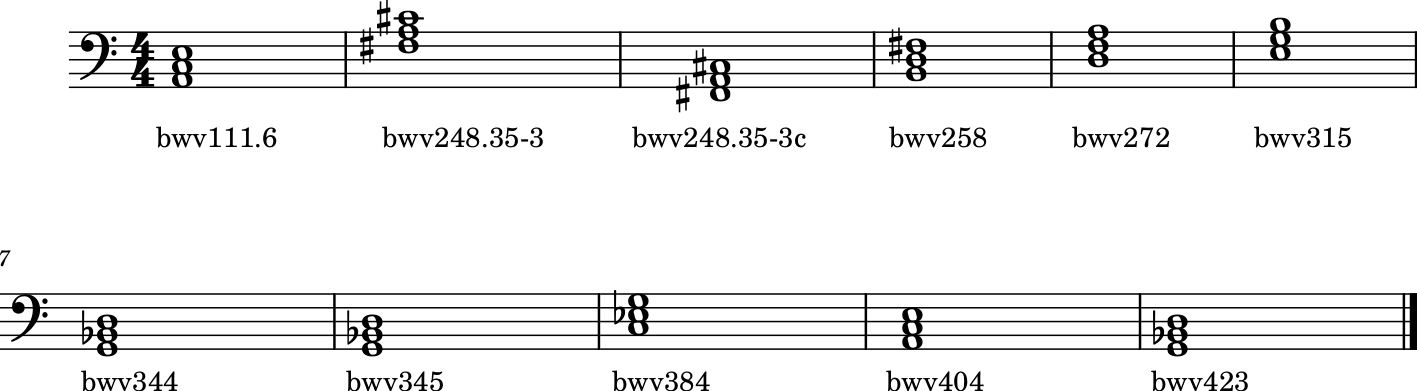

In [20]:
relevantStream = stream.Stream()
relevantStream.append(meter.TimeSignature('4/4'))

for chorale in chorales:
    score = chorale.parse()
    falseOrChord = isRelevant(score)
    if falseOrChord is not False:
        title = score.metadata.corpusFilePath.replace('bach/', '').replace('.mxl', '')
        theChord = falseOrChord  # rename for clarity
        theChord.lyric = title
        relevantStream.append(theChord)

relevantStream.show()

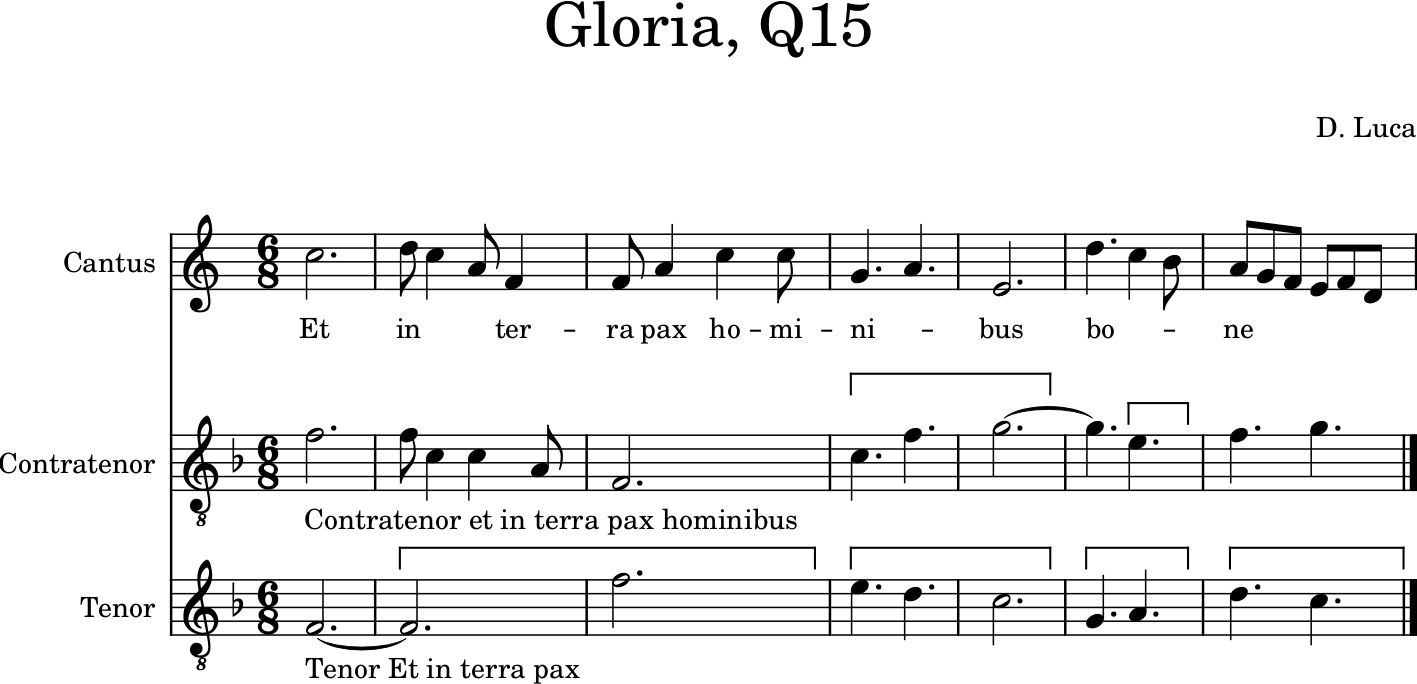

In [21]:
from music21 import *

luca = corpus.parse('luca/gloria')
luca.measures(1, 7).show()

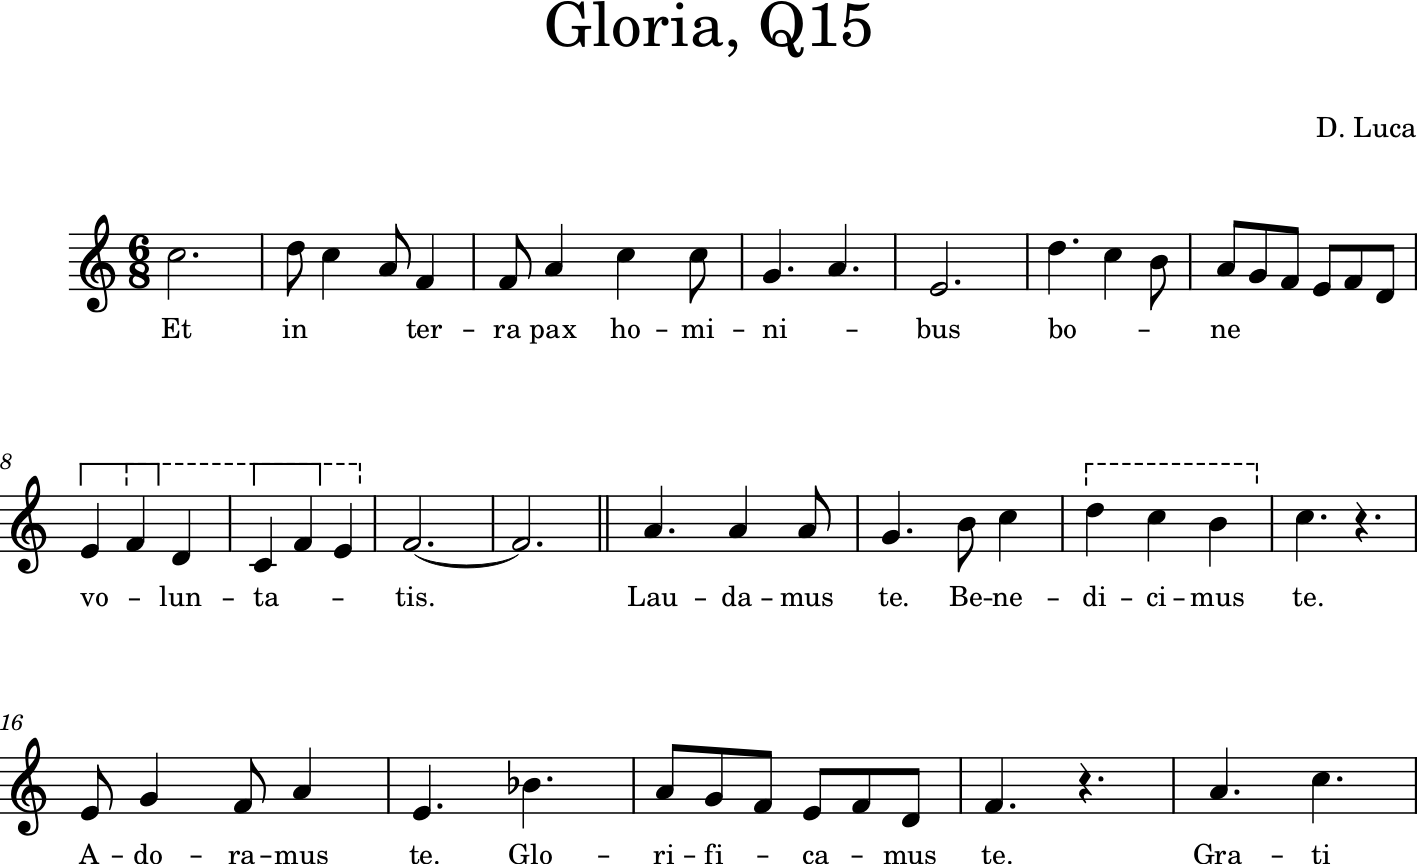

In [22]:
cantus = luca.parts['Cantus']
cantus.measures(1, 20).show()

In [23]:
totalNotes = 0
totalHeight = 0
for n in cantus.recurse().getElementsByClass('Note'):
    totalNotes += 1
    totalHeight += n.pitch.ps
averageHeight = totalHeight/totalNotes
averageHeight

67.41100323624596

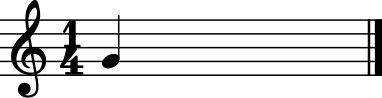

In [24]:
averageNote = note.Note()
averageNote.pitch.ps = round(averageHeight)
averageNote.show()

In [25]:
exactAveragePitch = pitch.Pitch(ps=averageHeight)
exactAveragePitch.step

'G'

In [26]:
exactAveragePitch.accidental

<music21.pitch.Accidental half-sharp>

In [27]:
exactAveragePitch.microtone

<music21.pitch.Microtone (-9c)>

In [28]:
import statistics
statistics.mean([p.ps for p in cantus.pitches])

67.41100323624596

In [29]:
statistics.median([p.ps for p in cantus.pitches])

67.0

In [30]:
medianHeight = statistics.median([p.ps for p in cantus.pitches])

In [31]:
allIntervals = []
for n in cantus.recurse().getElementsByClass('Note'):
    nextNote = n.next('Note')
    if nextNote is None: # last note of the piece
        continue
    thisInterval = interval.Interval(n, nextNote)
    allIntervals.append(thisInterval)

In [32]:
allIntervals[0:5]

[<music21.interval.Interval M2>,
 <music21.interval.Interval M-2>,
 <music21.interval.Interval m-3>,
 <music21.interval.Interval M-3>,
 <music21.interval.Interval P1>]

In [33]:
len(allIntervals)

308

In [34]:
len(cantus[note.Note])

309

In [35]:
firstInterval = allIntervals[0]
firstInterval.noteStart

<music21.note.Note C>

In [36]:
firstInterval.noteEnd

<music21.note.Note D>

In [37]:
firstInterval.direction

<Direction.ASCENDING: 1>

In [38]:
firstInterval.generic

<music21.interval.GenericInterval 2>

In [39]:
firstInterval.generic.directed

2

In [40]:
secondInterval = allIntervals[1]
secondInterval.generic.directed

-2

In [41]:
secondInterval.generic.undirected

2

In [42]:
def relevant(thisInterval):
    if thisInterval.generic.undirected < 3:
        return False
    noteEndPs = thisInterval.noteEnd.pitch.ps
    if thisInterval.direction == interval.Direction.ASCENDING and noteEndPs < medianHeight:
        return True
    elif thisInterval.direction == interval.Direction.DESCENDING and noteEndPs > medianHeight:
        return True
    else:
        return False

In [43]:
[relevant(i) for i in allIntervals].count(True)

22

In [44]:
[relevant(i) for i in allIntervals[0:10]]

[False, False, True, False, False, False, False, False, False, False]

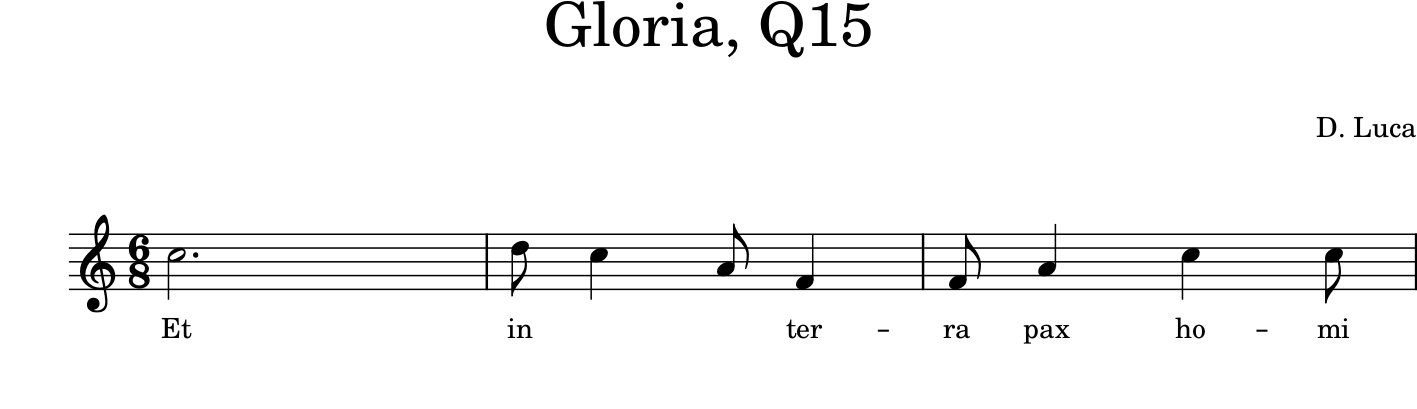

In [45]:
cantus.measures(1, 3).show()

In [46]:
def whichHypothesis(firstInterval, secondInterval):
    if secondInterval.direction == interval.Direction.OBLIQUE:
        return 0
    elif secondInterval.direction != firstInterval.direction:
        return 1
    else:
        return 2


In [47]:
whichHypothesis(allIntervals[2], allIntervals[3])

2

In [48]:
obliqueGapRegression = [0, 0, 0]

for i in range(len(allIntervals) - 1):
    thisInterval = allIntervals[i]
    nextInterval = allIntervals[i + 1]
    if not relevant(thisInterval):
        continue
    hypothesis = whichHypothesis(thisInterval, nextInterval)
    obliqueGapRegression[hypothesis] += 1

obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2]

([6, 10, 6], 4)

In [49]:
def relevant2(thisInterval, medianHeight):
    if thisInterval.generic.undirected < 3:
        return False
    noteEndPs = thisInterval.noteEnd.pitch.ps
    if thisInterval.direction == interval.Direction.ASCENDING and noteEndPs < medianHeight:
        return True
    elif thisInterval.direction == interval.Direction.DESCENDING and noteEndPs > medianHeight:
        return True
    else:
        return False

In [50]:
def onePartHypothesis(part):
    obliqueGapRegression = [0, 0, 0]

    medianHeight = statistics.median([p.ps for p in part.pitches])
    allIntervals = []
    for n in part.recurse().getElementsByClass('Note'):
        nextNote = n.next('Note')
        if nextNote is None: # last note of the piece
            continue
        thisInterval = interval.Interval(n, nextNote)
        allIntervals.append(thisInterval)

    for i in range(len(allIntervals) - 1):
        thisInterval = allIntervals[i]
        nextInterval = allIntervals[i + 1]
        if not relevant2(thisInterval, medianHeight):
            continue
        hypothesis = whichHypothesis(thisInterval, nextInterval)
        obliqueGapRegression[hypothesis] += 1

    return obliqueGapRegression

In [51]:
onePartHypothesis(cantus)

[6, 10, 6]

In [52]:
obliqueGapRegression = [0, 0, 0]

for p in luca.parts:
    onePartTotals = onePartHypothesis(p)
    obliqueGapRegression[0] += onePartTotals[0]
    obliqueGapRegression[1] += onePartTotals[1]
    obliqueGapRegression[2] += onePartTotals[2]

obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2]

([7, 20, 28], -8)

In [53]:
corpus.search('trecento')

<music21.metadata.bundles.MetadataBundle {103 entries}>

In [54]:
obliqueGapRegression = [0, 0, 0]

for trecentoPieceEntry in corpus.search('trecento')[:20]:
    parsedPiece = trecentoPieceEntry.parse()
    for p in parsedPiece.parts:
        onePartTotals = onePartHypothesis(p)
        obliqueGapRegression[0] += onePartTotals[0]
        obliqueGapRegression[1] += onePartTotals[1]
        obliqueGapRegression[2] += onePartTotals[2]

obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2]

([27, 86, 84], 2)